<a href="https://colab.research.google.com/github/rkrissada/100DayOfMLCode/blob/master/day_040_linear_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [0]:
np.random.seed(101) 
tf.set_random_seed(101) 

In [0]:
# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 
  
# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 
  
n = len(x) # Number of data points 

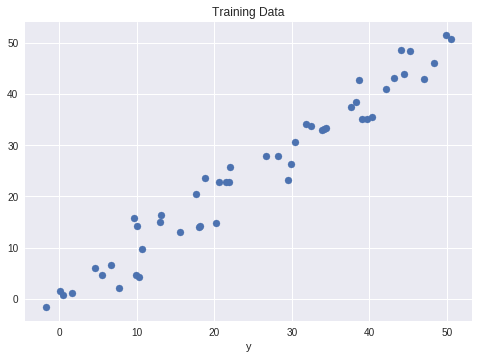

In [4]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

In [0]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 

In [6]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
learning_rate = 0.01
training_epochs = 1000

In [8]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 
  
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

Instructions for updating:
Use tf.cast instead.


In [9]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = 5.886804 W = 0.9951241 b = 1.2381054
Epoch 100 : cost = 5.7912707 W = 0.99812365 b = 1.0914398
Epoch 150 : cost = 5.7119684 W = 1.0008028 b = 0.96044314
Epoch 200 : cost = 5.6459413 W = 1.0031956 b = 0.8434396
Epoch 250 : cost = 5.5907993 W = 1.0053328 b = 0.73893565
Epoch 300 : cost = 5.544605 W = 1.0072418 b = 0.6455924
Epoch 350 : cost = 5.5057893 W = 1.008947 b = 0.56222016
Epoch 400 : cost = 5.473066 W = 1.01047 b = 0.48775372
Epoch 450 : cost = 5.445385 W = 1.0118302 b = 0.42124188
Epoch 500 : cost = 5.4219036 W = 1.0130452 b = 0.36183503
Epoch 550 : cost = 5.4019217 W = 1.0141305 b = 0.3087744
Epoch 600 : cost = 5.3848577 W = 1.0150996 b = 0.26138142
Epoch 650 : cost = 5.370246 W = 1.0159653 b = 0.21905117
Epoch 700 : cost = 5.3576994 W = 1.0167387 b = 0.18124233
Epoch 750 : cost = 5.346891 W = 1.0174292 b = 0.14747268
Epoch 800 : cost = 5.337558 W = 1.0180461 b = 0.11730959
Epoch 850 : cost = 5.3294754 W = 1.0185971 b = 0.09036876
Epoch 900 : cost = 5.322459 W

In [10]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 


Training cost = 5.3110337 Weight = 1.0199214 bias = 0.02561676 



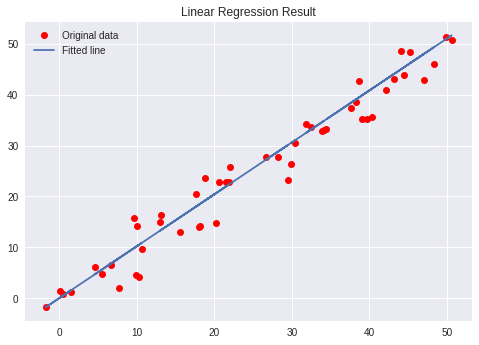

In [11]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 